# REINFORCE Email test

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import logging
import os
import sys
import warnings

import torch
import torch.optim as optim

ROOT_FOLDER = os.path.join(".", "..")
if ROOT_FOLDER not in sys.path:
    sys.path.insert(0, ROOT_FOLDER)


from dataset import RegexDataset
from environment_metrics import Environment, EnvSettings
from plot import plot_rewards
from reinforce import PGN, evaluate, train_eval_loop
from rl import PolicyAgent as Agent
from rl import PolicyTrajectoryBuffer as TrajectoryBuffer
from utils import set_seed

warnings.filterwarnings("ignore")
logging.disable(logging.WARNING)
torch.backends.cudnn.deterministic = True
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cpu')

## Training

In [8]:
set_seed()
dataset = RegexDataset(*RegexDataset.from_disk("../../data/email.json"))
env = Environment(
    dataset,
    settings=EnvSettings(max_steps=10),
)

agent = Agent(temperature_coefficient=0)
buffer = TrajectoryBuffer(batch_size=64, device=DEVICE)

pgn = PGN(input_dim=env.state_space, output_dim=env.action_space).to(DEVICE)
pgn_optimizer = optim.Adam(pgn.parameters(), lr=1e-4)

In [ ]:
episode_rewards = train_eval_loop(
    pgn,
    pgn_optimizer,
    agent,
    buffer,
    env,
    epochs=100,
    episodes=1000,
    device=DEVICE,
    eval_period=20,
    entropy_beta=0.01,
    clip_grad=10,
)

Epoch   1/100:	Reward: -213.0	Loss: -6.872
Epoch   2/100:	Reward: -212.7	Loss: -7.421
Epoch   3/100:	Reward: -212.9	Loss: -7.132
Epoch   4/100:	Reward: -212.6	Loss: -7.559
Epoch   5/100:	Reward: -212.5	Loss: -7.662
Epoch   6/100:	Reward: -212.5	Loss: -7.725
Epoch   7/100:	Reward: -212.3	Loss: -8.088
Epoch   8/100:	Reward: -212.7	Loss: -7.389
Epoch   9/100:	Reward: -212.5	Loss: -7.632
Epoch  10/100:	Reward: -212.6	Loss: -7.583
Epoch  11/100:	Reward: -212.3	Loss: -8.047
Epoch  12/100:	Reward: -212.2	Loss: -8.103
Epoch  13/100:	Reward: -212.7	Loss: -7.468
Epoch  14/100:	Reward: -212.8	Loss: -7.231
Epoch  15/100:	Reward: -212.3	Loss: -7.937
Epoch  16/100:	Reward: -212.7	Loss: -7.412
Epoch  17/100:	Reward: -212.7	Loss: -7.384
Epoch  18/100:	Reward: -212.6	Loss: -7.597
Epoch  19/100:	Reward: -212.6	Loss: -7.471
Epoch  20/100:	Reward: -212.5	Loss: -7.627
Epoch  21/100:	Reward: -212.5	Loss: -7.767
Epoch  22/100:	Reward: -212.6	Loss: -7.506
Epoch  23/100:	Reward: -212.8	Loss: -7.187
Epoch  24/1

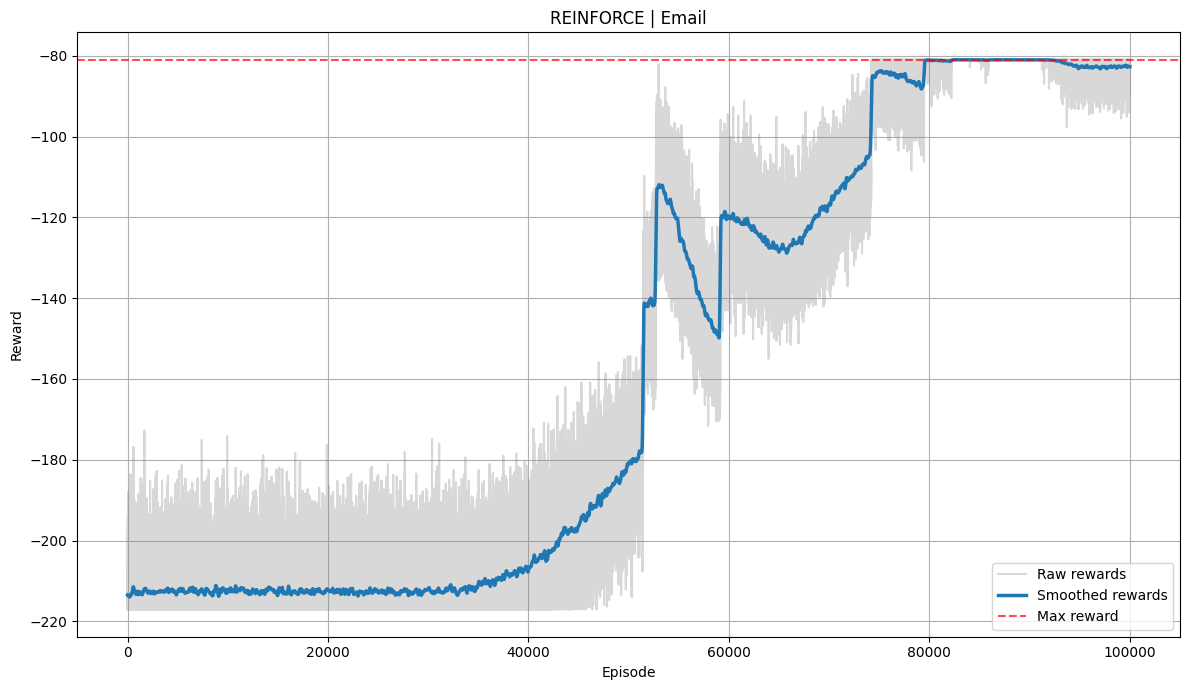

In [18]:
plot_rewards(episode_rewards, title="REINFORCE | Email", window=50)

## Results

In [ ]:
set_seed()
trained_regex, trained_reward = evaluate(pgn, env, agent, device=DEVICE)
print(f"Regex: {trained_regex}")
print(f"Total Reward: {trained_reward}")

Regex: @.+
Total Reward: -40971.12701509586


In [11]:
set_seed()
random_regex, random_reward = evaluate(pgn, env, agent, random=True, device=DEVICE)
print(f"Regex: {random_regex}")
print(f"Total Reward: {random_reward}")

Regex: Q:CnO<
Total Reward: -76470.91117688805
